## Dog or Not Dog [shiv]

In [1]:
from imgdata import ImgData
import numpy as np

Total 1001 image files found


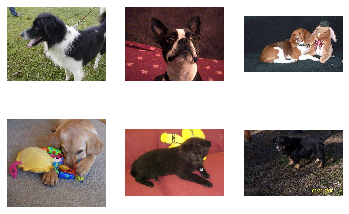

In [2]:
idog= ImgData("data/dog/")
idog.get_all_files()
idog.plot_raw_sample(rows= 2, cols= 3)

In [3]:
dog_data = idog.process(size=(150,150), count= 500, silent= True)

Resizing DONE
Converting to NP DONE


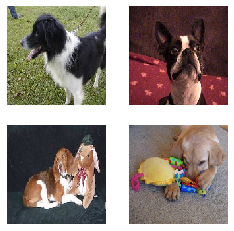

In [4]:
idog.plot_np_imgs(dog_data)

Total 500 image files found


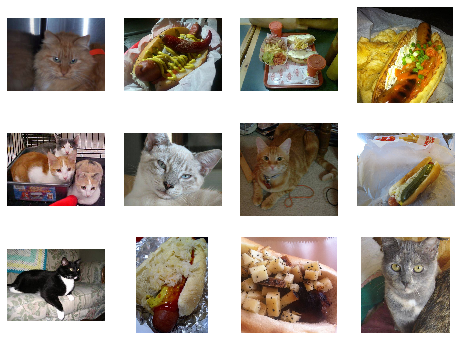

In [5]:
indog= ImgData("data/notdog/")
indog.get_all_files()
indog.plot_raw_sample(rows= 3, cols= 4)

In [6]:
ndog_data = indog.process(size=(150,150), count= 500, silent= True)

Resizing DONE
Converting to NP DONE


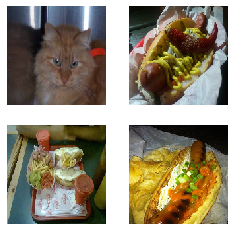

In [7]:
indog.plot_np_imgs(ndog_data)

### Combining

In [8]:
y_dog= np.zeros((dog_data.shape[0], 1))
y_ndog= np.ones((ndog_data.shape[0], 1))
print(y_dog.shape, y_ndog.shape)

(500, 1) (500, 1)


In [9]:
X_train, y_train= idog.shuffle([(dog_data, y_dog), (ndog_data, y_ndog)])

In [25]:
X_train.shape

(1000, 150, 150, 3)

In [26]:
y_train.shape

(1000, 1)

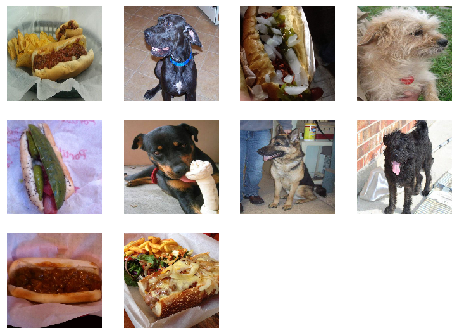

[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]]


In [29]:
idog.plot_np_imgs(X_train, count=10)
print(y_train[:10])

## Model Building

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [11]:
img_input= layers.Input(shape=(150, 150, 3))

In [12]:
x= layers.Conv2D(16, 3, activation='relu')(img_input)

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
x= layers.MaxPool2D(2)(x)

In [14]:
x= layers.Conv2D(32, 3, activation='relu')(x)

In [15]:
x= layers.MaxPool2D(2)(x)

In [16]:
x= layers.Conv2D(64, 3, activation='relu')(x)

In [17]:
x= layers.MaxPool2D(2)(x)

In [18]:
x= layers.Flatten()(x)

In [19]:
x= layers.Dense(512, activation='relu')(x)

In [20]:
output= layers.Dense(1, activation='sigmoid')(x)

In [21]:
model= Model(img_input, output)

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [23]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [24]:
imgs.shape

NameError: name 'imgs' is not defined

In [ ]:
y= np.ones((1000,1))

In [ ]:
y.shape

In [ ]:
model.fit(imgs, y)

In [ ]:
y_pred= model.predict(np.array([imgs[1]]))
y_pred

In [ ]:
a= np.array([[1,2,3],[4,5,6]])
b= np.array([[11,12,13],[14,15,16]])
print(a)
print(b)

In [ ]:
ay= np.ones((2,1))
by= np.zeros((2,1))
print(ay)
print(by)

In [ ]:
c= np.concatenate([a,b], axis= 0)
print(c)

In [ ]:
d= idata.shuffle([(a,ay),(b,by)])
d